In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io as sio
import seaborn as sns
import os
import h5py
from PIL import Image
from pathlib import Path
from scipy import signal, interpolate, stats
from tkinter import filedialog, simpledialog
from tkinter import *
import ptitprince as pt
import re



In [2]:
root = Tk()
root.withdraw()


mat_filenames =  filedialog.askopenfilename(title = "Select Fall.mat files", filetypes = (("Mat files","*Fall.mat"),), multiple = True)
mouse_name = simpledialog.askstring("Mouse name", "Enter mouse name:")


In [3]:
dff_list = []
session_list = []
peaks_list = []
widths_list = []
ph_list = []

i = 0

for j in range(0,len(mat_filenames)):
    mat = sio.loadmat(mat_filenames[j])
    iscell = mat['iscell']
    #Load calcium data and iscell binary list from concatenated s2p run
    F = mat['F']
    #Find 
    ses_num = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", mat_filenames[j])

    #Select real cells and normalize raw calcium signal
    #Need to convert iscell to array? Probably just being stupid
    x = iscell[:,0].astype(bool)

    F_real = F[x == 1,:]
    F_real[F_real == 0] = np.nan
    sesF_dff = []
    sespeaks = []
    seswidths = []
    sesheights = []
    #Get dimensions of real cell data
    for data in F_real:
        F_dff = stats.zscore(data)
        peaks, heights= signal.find_peaks(F_dff, height=1.5, distance=7)
        widths = signal.peak_widths(F_dff, peaks, rel_height=0.5)

        sesF_dff.append(F_dff)
        sespeaks.append(len(peaks))
        seswidths.append(np.mean(widths[0]))
        sesheights.append(np.mean(heights['peak_heights']))
    dff_list.append(sesF_dff)
    peaks_list.append(sespeaks)
    widths_list.append(seswidths)
    ph_list.append(sesheights)
    session_list.append(np.repeat(ses_num[2], len(sespeaks)))
    i = i + 1

In [30]:
def load_mouse(mat_filenames, name):    
    dff_list = []
    session_list = []
    peaks_list = []
    widths_list = []
    ph_list = []

    i = 0

    for j in range(0,len(mat_filenames)):
        mat = sio.loadmat(mat_filenames[j])
        iscell = mat['iscell']
        #Load calcium data and iscell binary list from concatenated s2p run
        F = mat['F']
        #Find 
        ses_num = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", mat_filenames[j])

        #Select real cells and normalize raw calcium signal
        #Need to convert iscell to array? Probably just being stupid
        x = iscell[:,0].astype(bool)

        F_real = F[x == 1,:]
        F_real[F_real == 0] = np.nan
        sesF_dff = []
        sespeaks = []
        seswidths = []
        sesheights = []
        #Get dimensions of real cell data
        for data in F_real:
            F_dff = stats.zscore(data)
            peaks, heights= signal.find_peaks(F_dff, height=1.5, distance=7)
            widths = signal.peak_widths(F_dff, peaks, rel_height=0.5)

            sesF_dff.append(F_dff)
            sespeaks.append(len(peaks))
            seswidths.append(np.mean(widths[0]))
            sesheights.append(np.mean(heights['peak_heights']))
        dff_list.append(sesF_dff)
        peaks_list.append(sespeaks)
        widths_list.append(seswidths)
        ph_list.append(sesheights)
        session_list.append(np.repeat(ses_num[2], len(sespeaks)))
        i = i + 1
    #Make a dictionary
    
    return dff_list, peaks_list, widths_list, ph_list, session_list

[Text(0, 0, 'B1'),
 Text(1, 0, 'B2'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'C4'),
 Text(4, 0, 'T6'),
 Text(5, 0, 'T7'),
 Text(6, 0, 'T8'),
 Text(7, 0, 'T9'),
 Text(8, 0, 'T11')]

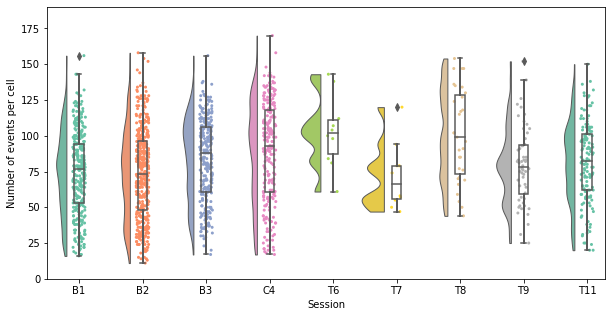

In [4]:
# Usage with a list/np.array input
dx = np.concatenate(session_list)
dy = np.concatenate(peaks_list)
f, ax = plt.subplots(figsize=(10, 5))
ax=pt.RainCloud(dx, dy)

plt.ylabel('Number of events per cell')
plt.xlabel('Session')
plt.ylim(0,190)
x_label_list = ['B1','B2','B3','C4','T6','T7','T8','T9','T11']
ax.set_xticklabels(x_label_list)

[Text(0, 0, 'B1'),
 Text(1, 0, 'B2'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'C4'),
 Text(4, 0, 'T6'),
 Text(5, 0, 'T7'),
 Text(6, 0, 'T8'),
 Text(7, 0, 'T9'),
 Text(8, 0, 'T11')]

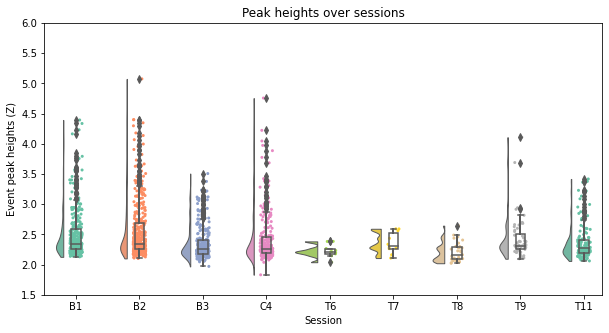

In [5]:
# Usage with a list/np.array input
dx = np.concatenate(session_list)
dy = np.concatenate(ph_list)
f, ax = plt.subplots(figsize=(10, 5))
ax=pt.RainCloud(dx, dy)
plt.ylim(1.5,6)
plt.ylabel('Event peak heights (Z)')
plt.xlabel('Session')
plt.title('Peak heights over sessions')
x_label_list = ['B1','B2','B3','C4','T6','T7','T8','T9','T11']
ax.set_xticklabels(x_label_list)

[Text(0, 0, 'B1'),
 Text(1, 0, 'B2'),
 Text(2, 0, 'B3'),
 Text(3, 0, 'C4'),
 Text(4, 0, 'T6'),
 Text(5, 0, 'T7'),
 Text(6, 0, 'T8'),
 Text(7, 0, 'T9'),
 Text(8, 0, 'T11')]

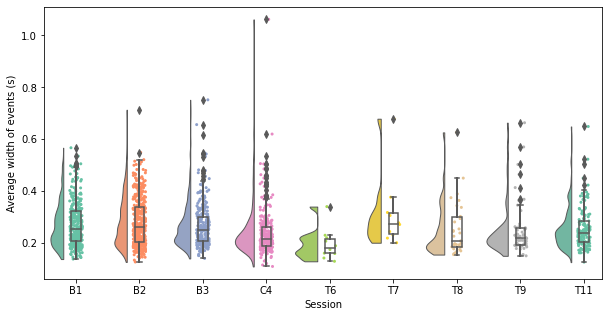

In [6]:
# Usage with a list/np.array input
dx = np.concatenate(session_list)
dy = np.concatenate(widths_list)*0.0645
f, ax = plt.subplots(figsize=(10, 5))
ax=pt.RainCloud(dx, dy)

plt.ylabel('Average width of events (s)')
plt.xlabel('Session')
#plt.ylim(0,190)
x_label_list = ['B1','B2','B3','C4','T6','T7','T8','T9','T11']
ax.set_xticklabels(x_label_list)

In [29]:
num_mice = simpledialog.askinteger("Number of animals","Number of animals:")

In [ ]:
for i in range(num_mice)